# Q1. Web Data Extraction and CSV Handling


In [ ]:
#import the necessary library
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [ ]:
#list for all item
Book_name = []
Author = []
Price = []
Language = []
Release_date = []

In [ ]:
# loop for iterating all the pages
for page_number in range(1,6):
    #accessing the url
    URL = requests.get(f"https://www.audible.co.uk/adblbestsellers?page={page_number}&ref=a_adblbests_c5_pageNum_1&pf_rd_p=936af2d3-3c4b-4217-a77c-041f7ca03d0d&pf_rd_r=JRAMJP3YVHQJWPD8XKZF&pageLoadId=xAYvs7LdI5IImGqD&creativeId=fbe07a73-2419-424c-95a9-e8bddfb7bff6")
    #Accessing the html text
    soup= BeautifulSoup(URL.text,"lxml")

    books = soup.find_all('li',class_='bc-list-item productListItem')# fetching all the books each page

    # loop for iterating all books and extracting the info
    for book in books:
        BN = book.find('li',class_='bc-list-item').text
        Book_name.append(BN)

        AN = book.find('li',class_='bc-list-item authorLabel')
        At = AN.find('a',class_='bc-link bc-color-link').text #fetching author name
        Author.append(At)

        RD = book.find('li',class_='bc-list-item releaseDateLabel').text #fetching release date
        rd_sp = str(RD).split(':')
        Release_date.append(rd_sp[1].strip())

        Lan = book.find('li',class_='bc-list-item languageLabel').text #fetching writting language
        Lan_sp = str(Lan).split(':')
        Language.append(Lan_sp[1].strip())

        pr = book.find('p',class_='bc-text buybox-regular-price bc-spacing-none bc-spacing-top-none').text #fetching price
        pr_sp = str(pr).strip()
        pri = pr_sp.split(' ')
        Price.append(pri[14])




In [ ]:
df=pd.DataFrame({'Book name':Book_name,'Author':Author,'Price':Price,'Language':Language,'Release date':Release_date}) #data put into the dataframe
df

,Book name,Author,Price,Language,Release date
0,\nNone of This Is True\n,Lisa Jewell,£31.99\n,English,20-07-23
1,\nAtomic Habits\n,James Clear,£10.99\n,English,18-10-18
2,"\nHarry Potter and the Philosopher's Stone, Bo...",J.K. Rowling,£17.99\n,English,20-11-15
3,\n$100M Leads\n,Alex Hormozi,£18.29\n,English,20-08-23
4,\nMythos\n,Stephen Fry,£16.99\n,English,02-11-17
...,...,...,...,...,...
95,\nNever Split the Difference\n,Chris Voss,£13.99\n,English,20-06-19
96,\nThe Primal Hunter 6\n,Zogarth,£27.49\n,English,15-08-23
97,\nBreaking the Habit of Being Yourself\n,Joe Dispenza,£22.89\n,English,26-03-20
98,"\nRed, White & Royal Blue\n",Casey McQuiston,£12.99\n,English,17-02-22


In [ ]:
#remove the extra character \n
Book_Name = []
for i in Book_name:
   rep = i.replace('\n','')
   Book_Name.append(rep)

Prices = []
for i in Price:
  rep = i.replace('\n','')
  Prices.append(rep)

In [ ]:
df['Book name'] = Book_Name
df['Price'] = Prices
df

,Book name,Author,Price,Language,Release date
0,None of This Is True,Lisa Jewell,£31.99,English,20-07-23
1,Atomic Habits,James Clear,£10.99,English,18-10-18
2,"Harry Potter and the Philosopher's Stone, Book 1",J.K. Rowling,£17.99,English,20-11-15
3,$100M Leads,Alex Hormozi,£18.29,English,20-08-23
4,Mythos,Stephen Fry,£16.99,English,02-11-17
...,...,...,...,...,...
95,Never Split the Difference,Chris Voss,£13.99,English,20-06-19
96,The Primal Hunter 6,Zogarth,£27.49,English,15-08-23
97,Breaking the Habit of Being Yourself,Joe Dispenza,£22.89,English,26-03-20
98,"Red, White & Royal Blue",Casey McQuiston,£12.99,English,17-02-22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Book name     100 non-null    object
 1   Author        100 non-null    object
 2   Price         100 non-null    object
 3   Language      100 non-null    object
 4   Release date  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [ ]:
df.to_csv('Web_Data_Extraction.csv',index=False)

# Q2. Data Manipulation, Analysis and Visualization

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks'

 ai4bharat-IndicNER.ipynb	     'Copy of Welcome to Colaboratory (1)'
 Annotated_corpus-B-NER.ipynb	      csvtojson.ipynb
 Annotated_corpus.ipynb		     'Customer segmentation anlysis.ipynb'
'annotated dataset full.csv'	     'dataset statistics.ipynb'
'annotated dataset full new.csv'      eda_cleaning.ipynb
'Assessment Data - Sheet2.csv'	      fastai1.ipynb
 Assessment.ipynb		      indic-transformers-bn-bert.ipynb
 bert-base-multilingual-cased.ipynb   Kowsher-bangla-bert.ipynb
 BERT-BILSTM-CRF-gcelikmasat.ipynb    Mall_Customers.csv
'Bi-LSTM with CRF for NER.ipynb'      monsoon-nlp-bangla-electra.ipynb
 BLNERC_BNER_dataset.json	      ner_all_tokens_vocab.txt
'BLNERC dataset.json'		      Ner_Bert1.ipynb
 BLNERC_dataset.json		      ner_dataset_sample.json
'BLNERC dataset new.json'	      ner_token_id_name.pkl
'Buet bangal bert.ipynb'	     'NER using Random Forest and CRF.ipynb'
'Buet bb dataset.json'		      sagorbert.ipynb
 cache				      sagorsarker-bangla-bert-base.ipynb
'Copy of Assessme

In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
data = pd.read_csv("Assessment Data - Sheet2.csv")
data

,Date,Product,Quantity,Price,Customer Name
0,2023-01-05,Product A,10,10.75,Customer 1
1,2023-01-06,Product D,41,22.50,Customer 2
2,2023-01-07,Product C,40,12.25,Customer 3
3,2023-01-08,Product C,34,10.75,Customer 4
4,2023-01-09,Product D,4,22.50,Customer 5
5,2023-01-10,Product B,43,17.00,Customer 6
6,2023-01-11,Product D,15,10.00,Customer 7
7,2023-01-12,Product C,12,22.00,Customer 8
8,2023-01-13,Product D,15,22.00,Customer 9
9,2023-01-14,Product B,12,22.00,Customer 1


In [ ]:
average_price = sum(data["Price"]/len(data['Price']))
print('The average price per unit for all products combined: ',round(average_price,2))

The average price per unit for all products combined:  16.74


In [ ]:
Total_revenue = sum(data['Price'])
print('The total revenue generated from these transactions: ',Total_revenue)

The total revenue generated from these transactions:  502.25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           30 non-null     object 
 1   Product        30 non-null     object 
 2   Quantity       30 non-null     int64  
 3   Price          30 non-null     float64
 4   Customer Name  30 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
grouped = data.groupby('Customer Name')['Quantity '].sum().sort_values(ascending=False)
grouped_to_df = pd.DataFrame(grouped).reset_index()
print(grouped_to_df)

   Customer Name  Quantity 
0    Customer 16         50
1     Customer 6         43
2     Customer 2         41
3     Customer 3         40
4     Customer 9         36
5     Customer 4         34
6    Customer 20         34
7    Customer 24         33
8    Customer 12         33
9    Customer 18         32
10   Customer 19         32
11   Customer 21         29
12   Customer 13         23
13   Customer 25         22
14    Customer 1         22
15   Customer 17         22
16   Customer 28         21
17   Customer 26         19
18   Customer 14         19
19    Customer 7         15
20   Customer 11         12
21   Customer 22         12
22   Customer 30         12
23    Customer 8         12
24   Customer 23         11
25   Customer 27          9
26   Customer 15          4
27    Customer 5          4


In [ ]:
max_quan = max(grouped_to_df['Quantity '])
for i in range (len(grouped_to_df)):
     if grouped_to_df['Quantity '][i] == max_quan:
         print('The customer who made the highest quantity purchase is: ',grouped_to_df['Customer Name'][i],' and the Quantity is: ',grouped_to_df['Quantity '][i])

The customer who made the highest quantity purchase is:  Customer 16  and the Quantity is:  50


In [ ]:
rev_max = data['Price'].max()

In [ ]:
print("The date when the company made the highest revenue")
for i in range(len(data)):
  if data['Price'][i]==rev_max:
    print(data['Date'][i])

The date when the company made the highest revenue
2023-01-06
2023-01-09
2023-01-19
2023-01-31


In [ ]:
print("The total revenue for each product")
grouped_product = data.groupby('Product')['Price'].sum().sort_values(ascending=False)
grouped_product_df = pd.DataFrame(grouped_product).reset_index()
print(grouped_product_df)

The total revenue for each product
     Product   Price
0  Product D  187.50
1  Product C  128.25
2  Product B  112.25
3  Product A   62.00
4  Product M   12.25


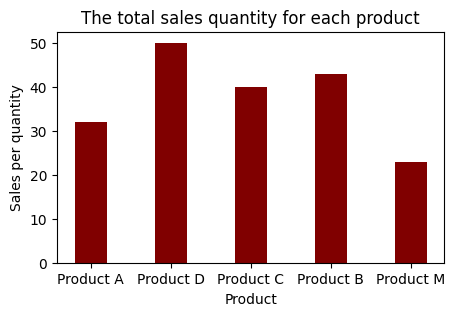

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5, 3))

# creating the bar plot
plt.bar(data['Product'], data['Quantity '], color ='maroon', width = 0.4)
plt.xlabel("Product")
plt.ylabel("Sales per quantity")
plt.title("The total sales quantity for each product")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

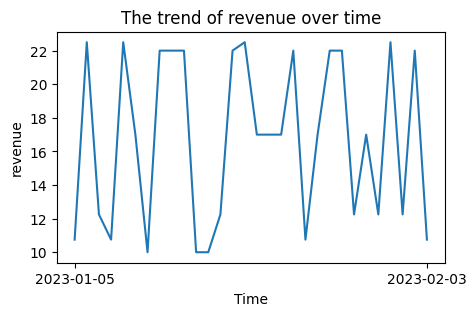

In [ ]:
fig = plt.figure(figsize = (5, 3))
plt.plot(data['Date'], data['Price'])
plt.xlabel('Time')
plt.ylabel('revenue')
plt.title('The trend of revenue over time')
plt.xticks([data['Date'][0],data['Date'][29]])
plt.show

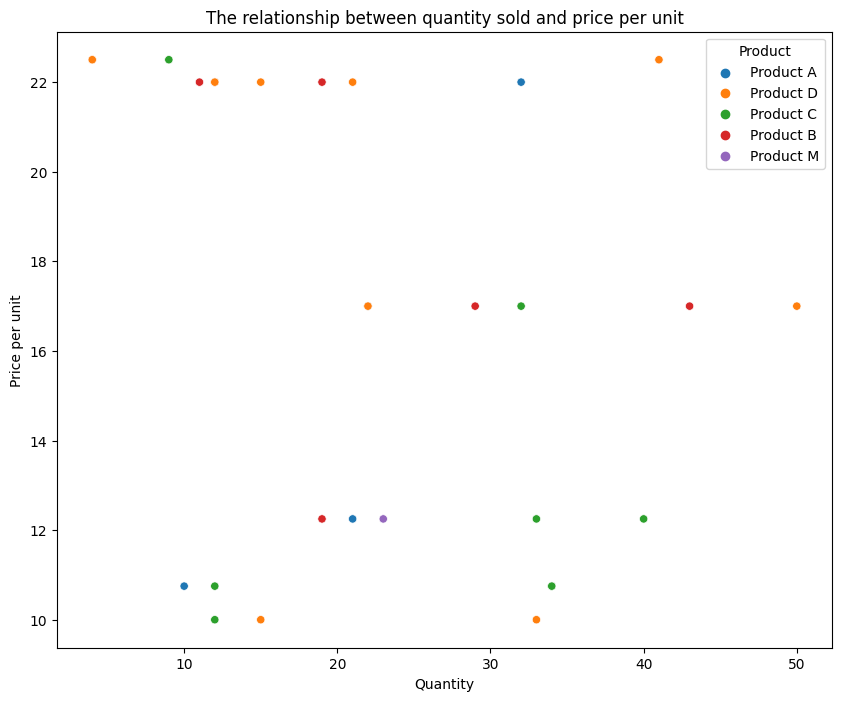

In [ ]:
import seaborn as sns
sns.scatterplot(data=data,x='Quantity ',y='Price',hue='Product',palette='tab10')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('The relationship between quantity sold and price per unit')
plt.xlabel('Quantity')
plt.ylabel('Price per unit')
plt.show()

# Q3. Basic Python Programming

In [ ]:
def max_profit(prices):
  prices.reverse()
  profit = []
  for i in range(len(prices)):
    for j in range(i+1,len(prices)):
      pro = prices[i]-prices[j]
      if pro>0:
        profit.append(pro)
  if len(profit)==0:
    return 0
  else:
    Maximum_profit = max(profit)
    return Maximum_profit


In [ ]:
#Test case 1
prices1 = [7, 1, 5, 3, 6, 4]
print(max_profit(prices1))

5


In [ ]:
#Test case 2
prices2 = [7, 6, 4, 3, 1]
print(max_profit(prices2))

0
